In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
sns.set_style("darkgrid")

import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 10

import plotly.graph_objects as go
import plotly.express as px

import pickle
import os
import gc

In [5]:
os.chdir("./제6회 L.POINT Big Data Competition/")

In [6]:
def resumetable(df):
    print(f"DataSet Shape : {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns={'dtypes'})
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name","dtypes"]]
    summary['Missing'] = df.isnull().sum().values
    summary['Unique'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, "Entropy"] = round(stats.entropy(df[name].value_counts(normalize = True), base=2),2)
        
    return summary

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [8]:
"""online_df = pd.read_csv("merged_onilne_df.csv")
online_df = reduce_mem_usage(online_df)"""

'online_df = pd.read_csv("merged_onilne_df.csv")\nonline_df = reduce_mem_usage(online_df)'

In [9]:
online_df = pd.read_csv("clear_merged_online_df.csv")
online_df = reduce_mem_usage(online_df)

Mem. usage decreased to 399.14 Mb (46.7% reduction)


In [5]:
clnt_id_list = online_df[online_df.action_type==6].clnt_id.unique()

In [7]:
online_df[(online_df.clnt_id == 2) & (online_df.action_type == 6)][["clnt_age", "clnt_gender", "clac_nm1", "time"]]

,clnt_age,clnt_gender,clac_nm1,time
46,30,F,NaN,2019-07-28 23:47:00
145,30,F,Beverages,2019-07-31 21:25:00
146,30,F,Canned / Jarred Foods,2019-07-31 21:25:00
147,30,F,Dairy Products,2019-07-31 21:25:00
148,30,F,Chilled Foods,2019-07-31 21:25:00
149,30,F,Chilled Foods,2019-07-31 21:25:00
171,30,F,Beverages,2019-08-01 22:00:00
251,30,F,Substitute Foods,2019-08-30 22:00:00
252,30,F,Substitute Foods,2019-08-30 22:00:00
253,30,F,Substitute Foods,2019-08-30 22:00:00


주로 먹을것을 시키는 편 / clac_nm1을 더 크게 분류해보는 것도 괜찮을 듯

In [ ]:
online_df[(online_df.clnt_id == 2) & (online_df.action_type == 6)].clac_nm1.unique().tolist()

In [ ]:
clnt_item_dict = {}
for clnt_id in clnt_id_list:
    items = online_df[(online_df.clnt_id == clnt_id) & (online_df.action_type == 6)].clac_nm1.unique().tolist()
    clnt_item_dict[clnt_id] = items

In [6]:
import pickle

In [29]:
with open('clnt_item_dict.pickle', 'wb') as f:
    pickle.dump(clnt_item_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
with open('clnt_item_dict.pickle', 'rb') as f:
    clnt_item_dict = pickle.load(f)

In [8]:
clnt_item_dict

{2: [nan,
  'Beverages',
  'Canned / Jarred Foods',
  'Dairy Products',
  'Chilled Foods',
  'Substitute Foods'],
 4: [nan],
 9: ['Frozen Foods',
  'Substitute Foods',
  'Snack Foods',
  'Dairy Products',
  'Beverages',
  'Personal Care',
  'Spices / Seasonings',
  'Chilled Foods'],
 12: [nan],
 17: [nan],
 19: [nan],
 20: [nan],
 22: [nan],
 23: [nan, "Kids' Clothing"],
 24: ['Dairy Products',
  'Frozen Foods',
  'Spices / Seasonings',
  'Canned / Jarred Foods',
  'Substitute Foods',
  'Beverages',
  'Grains',
  'Meats',
  'Snack Foods',
  nan],
 29: [nan],
 37: [nan],
 38: [nan],
 40: [nan, 'Bedding / Handicraft', "Women's Clothing"],
 41: [nan],
 42: [nan],
 43: [nan],
 45: ['Gardening / Pets'],
 49: ['Vegetables',
  'Meats',
  nan,
  'Chilled Foods',
  'Snack Foods',
  'Dairy Products',
  'Substitute Foods',
  'Fruits',
  'Spices / Seasonings',
  'Kitchenware',
  'Frozen Foods',
  'Detergents / Hygiene Goods',
  'Beverages',
  'Grains',
  'Canned / Jarred Foods',
  'Cleaning / Laun

In [38]:
indices

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [74]:
online_df.loc[(online_df.action_type==6) & (online_df.clac_nm1.isnull()), "clac_nm1"] = "unknown"

In [75]:
online_df[(online_df.clnt_id == 2) & (online_df.action_type==6)]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
46,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,47,-1.0,-1,-1.0,-1.0,F,30,unknown,NaN,NaN
145,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,25,5.0,92,1800.0,1.0,F,30,Beverages,Coffee Drinks,Coffee Drinks
146,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,25,2.0,151,3990.0,1.0,F,30,Canned / Jarred Foods,Canned Agricultural Foods,Canned Vegetable Foods
147,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,25,3.0,351,4690.0,1.0,F,30,Dairy Products,Processed Dairy Products,Cream and Condensed milk
148,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,25,4.0,189,4290.0,1.0,F,30,Chilled Foods,Fish Cakes and Crab Sticks,Fried Tofu
149,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,25,1.0,186,3790.0,1.0,F,30,Chilled Foods,Fish Cakes and Crab Sticks,Crab Sticks
171,2,10,16,6,A03,20190801,22:00,306944,65505.0,NaN,...,0,1.0,92,9000.0,5.0,F,30,Beverages,Coffee Drinks,Coffee Drinks
251,2,19,17,6,A03,20190830,22:00,2227390,88495.0,NaN,...,0,2.0,1395,2850.0,1.0,F,30,Substitute Foods,Instant Noodles,Ramens
252,2,19,17,6,A03,20190830,22:00,2227390,88495.0,NaN,...,0,3.0,1395,5700.0,2.0,F,30,Substitute Foods,Instant Noodles,Ramens
253,2,19,17,6,A03,20190830,22:00,2227390,88495.0,NaN,...,0,1.0,1395,3590.0,1.0,F,30,Substitute Foods,Instant Noodles,Ramens


In [81]:
online_df[(online_df.clnt_id == 2) & (online_df.action_type==6)].clac_nm1.value_counts(sort = False)

Dairy Products           1
Canned / Jarred Foods    1
Beverages                2
unknown                  1
Chilled Foods            2
Substitute Foods         3
Name: clac_nm1, dtype: int64

In [83]:
online_df[(online_df.clnt_id == 2) & (online_df.action_type==6)].clac_nm1.value_counts(sort = False).index

Index(['Dairy Products', 'Canned / Jarred Foods', 'Beverages', 'unknown',
       'Chilled Foods', 'Substitute Foods'],
      dtype='object')

In [90]:
online_df[(online_df.clnt_id == 2) & (online_df.action_type==6)].clac_nm1.value_counts(sort = False)["Substitute Foods"]

3

In [ ]:
clac_nm1_list = online_df.clac_nm1.unique().tolist()

In [91]:
one_hot_lst = []
for clnt_id in clnt_id_list:
    tmp = online_df[(online_df.clnt_id == clnt_id) & (online_df.action_type==6)].clac_nm1.value_counts(sort = False)
    indices = np.zeros(len(clac_nm1_list))
    for val in tmp.index:
        indices[clac_nm1_list.index(val)] = tmp[val]
    one_hot_lst.append(indices)

In [93]:
one_hot_df = pd.DataFrame(one_hot_lst)
one_hot_df = one_hot_df.astype(int)
one_hot_df.columns = clac_nm1_list
one_hot_df.index = clnt_id_list

In [102]:
# one_hot_df.to_csv("purchase_num_by_category.csv")

In [57]:
one_hot_lst = []
for key, val_list in clnt_item_dict.items():
    indices = np.zeros(len(clac_nm1_list))
    for val in val_list:
        if type(val) == float:
            indices[0] = 1
        else:
            indices[clac_nm1_list.index(val)] = 1
    one_hot_lst.append(indices)

In [64]:
one_hot_lst = pd.DataFrame(one_hot_lst).astype(int)

In [65]:
one_hot_lst.columns = clac_nm1_list

In [ ]:
# 검색해본 경험이 있는 사람의 구매율

In [34]:
online_df[online_df.action_type==0].clnt_id.nunique()

38564

In [37]:
online_df[(online_df.clnt_id.isin(online_df[online_df.action_type==0].clnt_id.unique())) & ( online_df.action_type == 6)].clnt_id.nunique()

13457

In [39]:
np.round(13457 / 38564, 2)

0.35

#### 시간대별 접속기기 및 접속경로에 따른 구매율 차이가 존재 하는가?

1. 시간대별 접속기기 및 접속경로 분포 확인 => session_id unique한 갯수
2. 시간대별 구매율 =  (#해당 시간 구매한 이력이 있는 session_id)/(#해당시간 총 session_id수)

In [ ]:
online_df.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first")[ online_df.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").action_type == 6].groupby("hour").size().reset_index().rename(columns = {0 : 'purc_counts'})

In [152]:
#시간대별 총 session_id수
unique_sess_id_per_hour = online_df.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby("hour").size().reset_index().rename(columns = {0 : 'tot_counts'})

#시간대별 구매이력이 있는 session_id수
unique_purchase_id_per_hour = online_df[online_df.action_type==6].drop_duplicates(["clnt_id","sess_id"], keep = "first").groupby("hour").size().reset_index(name = 'purc_counts')

In [153]:
purchase_rate = unique_sess_id_per_hour.merge(unique_purchase_id_per_hour)
purchase_rate["purc_rate"] = np.round(purchase_rate.purc_counts / purchase_rate.tot_counts * 100,2)

Text(0.5, 1.0, '시간대별 구매율 비교')

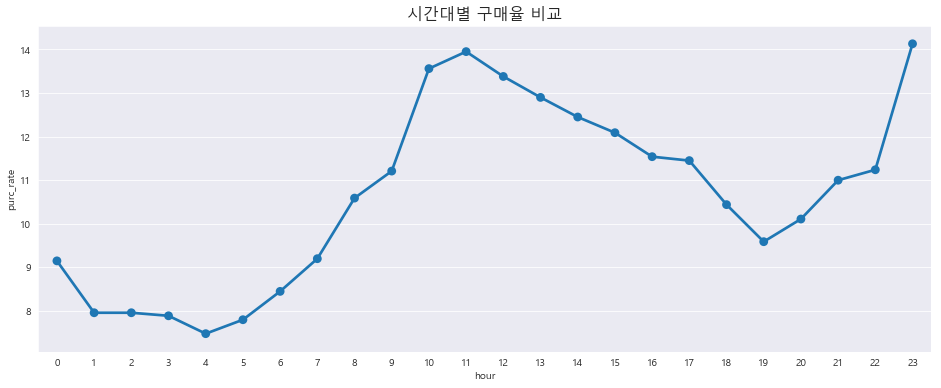

In [154]:
plt.figure(figsize = (16,6))
sns.pointplot( x = purchase_rate.hour, y= purchase_rate.purc_rate)
plt.title("시간대별 구매율 비교", fontsize = 16)

In [60]:
#시간대별 총 session_id수

unique_sess_id_per_hour_weekday = online_df.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby(["weekday","hour"]).size().reset_index().rename(columns = {0 : 'tot_counts'})
#시간대별 구매이력이 있는 session_id수
#unique_purchase_id_per_hour_weekday = online_df.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first")[ online_df.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").action_type == 6].groupby(["weekday", "hour"]).size().reset_index().rename(columns = {0 : 'purc_counts'})
unique_purchase_id_per_hour_weekday = online_df[online_df.action_type == 6].drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby(["clnt_id","sess_id","weekday", "hour"]).size().reset_index().groupby(["weekday","hour"]).size().reset_index(name = "purc_counts")
purchase_rate_2 = unique_sess_id_per_hour_weekday.merge(unique_purchase_id_per_hour_weekday)
purchase_rate_2["purc_rate_2"] = np.round(purchase_rate_2.purc_counts / purchase_rate_2.tot_counts * 100,2)

In [30]:
food_cat = ["Vegetables","Meats","Substitute Foods","Snack Foods","Dairy Products","Chilled Foods","Frozen Foods","Fruits","Beverages","Spices / Seasonings",
"Canned / Jarred Foods","Dried Sea Foods","Sea Foods","Grains","Coffee / Tea","Cooked Foods","Health Foods","Liquors / Alcoholic Beverages"]

In [145]:
online_df[online_df.clac_nm1.isin(food_cat)].drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby(["clnt_id","sess_id","weekday",'hour']).size().reset_index().groupby(["weekday","hour"]).size().reset_index(name = "purc_counts")

,weekday,hour,purc_counts
0,0,0,27
1,0,1,19
2,0,2,11
3,0,3,6
4,0,4,5
5,0,5,4
6,0,6,15
7,0,7,32
8,0,8,54
9,0,9,122


In [ ]:
online_df[online_df.clac_nm1.isin(food_cat)].drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first")[ online_df[online_df.clac_nm1.isin(food_cat)].drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").action_type == 6].groupby(["weekday", "hour"]).size().reset_index().rename(columns = {0 : 'purc_counts'})

In [61]:
#시간대별 총 session_id수
unique_sess_id_per_hour_weekday = online_df.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby(["weekday","hour"]).size().reset_index().rename(columns = {0 : 'tot_counts'})

#시간대별 음식카테고리 구매이력이 있는 session_id수
unique_purchase_id_per_hour_weekday_food = online_df[online_df.clac_nm1.isin(food_cat)].drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first")[ online_df[online_df.clac_nm1.isin(food_cat)].drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").action_type == 6].groupby(["weekday", "hour"]).size().reset_index().rename(columns = {0 : 'purc_counts'})

purchase_rate_3 = unique_sess_id_per_hour_weekday.merge(unique_purchase_id_per_hour_weekday_food)
purchase_rate_3["purc_rate_2"] = np.round(purchase_rate_3.purc_counts / purchase_rate_3.tot_counts * 100,2)

In [ ]:
#시간대별 총 session_id수
unique_sess_id_per_hour_weekday = online_df.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby(["weekday","hour"]).size().reset_index().rename(columns = {0 : 'tot_counts'})

#시간대별 음식카테고리 구매이력이 있는 session_id수
unique_purchase_id_per_hour_weekday_not_food = online_df[~online_df.clac_nm1.isin(food_cat)].drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first")[ online_df[online_df.clac_nm1.isin(food_cat)].drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").action_type == 6].groupby(["weekday", "hour"]).size().reset_index().rename(columns = {0 : 'purc_counts'})

purchase_rate_4 = unique_sess_id_per_hour_weekday.merge(unique_purchase_id_per_hour_weekday_not_food)
purchase_rate_4["purc_rate_2"] = np.round(purchase_rate_4.purc_counts / purchase_rate_4.tot_counts * 100,2)

In [27]:
weekdays = ["월","화","수","목","금","토","일"]

In [1]:
"""for i in range(7):
    fig, ax = plt.subplots(ncols=2, figsize = (24,5))
    tmp_df = purchase_rate_2[purchase_rate_2.weekday == i]
    tmp_df2 = purchase_rate_3[purchase_rate_3.weekday == i]
    sns.lineplot(x = tmp_df.hour, y=tmp_df.purc_rate_2, color = 'magenta', ax = ax[0])
    sns.lineplot(x = tmp_df2.hour, y=tmp_df2.purc_rate_2, color = 'green', ax = ax[1])
    ax[0].set_title("카테고리 전체 구매율 - {}".format(weekdays[i]))
    ax[1].set_title("카테고리 음식 구매율 - {}".format(weekdays[i]))
    #ax[1].set_ylim(0,15)
    plt.show()
    fig.savefig("./plots/구매율비교2_{}".format(weekdays[i]))"""

'for i in range(7):\n    fig, ax = plt.subplots(ncols=2, figsize = (24,5))\n    tmp_df = purchase_rate_2[purchase_rate_2.weekday == i]\n    tmp_df2 = purchase_rate_3[purchase_rate_3.weekday == i]\n    sns.lineplot(x = tmp_df.hour, y=tmp_df.purc_rate_2, color = \'magenta\', ax = ax[0])\n    sns.lineplot(x = tmp_df2.hour, y=tmp_df2.purc_rate_2, color = \'green\', ax = ax[1])\n    ax[0].set_title("카테고리 전체 구매율 - {}".format(weekdays[i]))\n    ax[1].set_title("카테고리 음식 구매율 - {}".format(weekdays[i]))\n    #ax[1].set_ylim(0,15)\n    plt.show()\n    fig.savefig("./plots/구매율비교2_{}".format(weekdays[i]))'

In [2]:
"""for i in range(7):
    fig, ax = plt.subplots(ncols=2, figsize = (24,5))
    tmp_df = purchase_rate_2[purchase_rate_2.weekday == i]
    tmp_df2 = purchase_rate_3[purchase_rate_3.weekday == i]
    sns.lineplot(x = tmp_df.hour, y=tmp_df.purc_rate_2, color = 'magenta', ax = ax[0])
    sns.lineplot(x = tmp_df2.hour, y=tmp_df2.purc_rate_2, color = 'green', ax = ax[1])
    ax[0].set_title("카테고리 전체 구매율 - {}".format(weekdays[i]))
    ax[1].set_title("카테고리 음식 구매율 - {}".format(weekdays[i]))
    ax[1].set_ylim(0,15)
    plt.show()
    #fig.savefig("./plots/구매율비교_{}".format(weekdays[i]))"""

'for i in range(7):\n    fig, ax = plt.subplots(ncols=2, figsize = (24,5))\n    tmp_df = purchase_rate_2[purchase_rate_2.weekday == i]\n    tmp_df2 = purchase_rate_3[purchase_rate_3.weekday == i]\n    sns.lineplot(x = tmp_df.hour, y=tmp_df.purc_rate_2, color = \'magenta\', ax = ax[0])\n    sns.lineplot(x = tmp_df2.hour, y=tmp_df2.purc_rate_2, color = \'green\', ax = ax[1])\n    ax[0].set_title("카테고리 전체 구매율 - {}".format(weekdays[i]))\n    ax[1].set_title("카테고리 음식 구매율 - {}".format(weekdays[i]))\n    ax[1].set_ylim(0,15)\n    plt.show()\n    #fig.savefig("./plots/구매율비교_{}".format(weekdays[i]))'

In [ ]:
for i in range(7):
    fig, ax = plt.subplots(ncols=2, figsize = (24,5))
    tmp_df = purchase_rate_2[purchase_rate_2.weekday == i]
    tmp_df2 = purchase_rate_3[purchase_rate_3.weekday == i]
    sns.lineplot(x = tmp_df.hour, y=tmp_df.purc_rate_2, color = 'magenta', ax = ax[0])
    sns.lineplot(x = tmp_df2.hour, y=tmp_df2.purc_rate_2, color = 'green', ax = ax[1])
    ax[0].set_title("카테고리 전체 구매율 - {}".format(weekdays[i]))
    ax[1].set_title("카테고리 음식 구매율 - {}".format(weekdays[i]))
    ax[1].set_ylim(0,15)
    plt.show()
    #fig.savefig("./plots/구매율비교_{}".format(weekdays[i]))

In [73]:
sub_mobile_web = online_df[online_df.dvc_ctg_nm == "mobile_web"]
sub_mobile_app = online_df[online_df.dvc_ctg_nm == "mobile_app"]
sub_PC = online_df[online_df.dvc_ctg_nm == "PC"]
sub_unknown = online_df[online_df.dvc_ctg_nm == "unknown"]

In [12]:
"""sub_mobile_web = online_df[online_df.dvc_ctg_nm == "mobile_web"]
sub_mobile_app = online_df[online_df.dvc_ctg_nm == "mobile_app"]
sub_PC = online_df[online_df.dvc_ctg_nm == "PC"]"""

'sub_mobile_web = online_df[online_df.dvc_ctg_nm == "mobile_web"]\nsub_mobile_app = online_df[online_df.dvc_ctg_nm == "mobile_app"]\nsub_PC = online_df[online_df.dvc_ctg_nm == "PC"]'

In [ ]:
#시간대별 총 session_id수
unique_sess_id_per_hour_mobile_web = sub_mobile_web.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby("hour").size().reset_index().rename(columns = {0 : 'tot_counts'})

#시간대별 구매이력이 있는 session_id수
unique_purchase_id_per_hour_mobile_web = sub_mobile_web[sub_mobile_web.action_type==6].groupby(["clnt_id","sess_id",'hour']).size().reset_index().groupby(["hour"]).size().reset_index(name = "purc_counts")

In [ ]:
#시간대별 총 session_id수
unique_sess_id_per_hour_mobile_app = sub_mobile_app.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby("hour").size().reset_index().rename(columns = {0 : 'tot_counts'})

#시간대별 구매이력이 있는 session_id수
unique_purchase_id_per_hour_mobile_app = sub_mobile_app[sub_mobile_app.action_type==6].groupby(["clnt_id","sess_id",'hour']).size().reset_index().groupby(["hour"]).size().reset_index(name = "purc_counts")

In [ ]:
#시간대별 총 session_id수
unique_sess_id_per_hour_PC = sub_PC.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby("hour").size().reset_index().rename(columns = {0 : 'tot_counts'})

#시간대별 구매이력이 있는 session_id수
unique_purchase_id_per_hour_PC = sub_PC[sub_PC.action_type==6].groupby(["clnt_id","sess_id",'hour']).size().reset_index().groupby(["hour"]).size().reset_index(name = "purc_counts")

In [ ]:
#시간대별 총 session_id수
unique_sess_id_per_hour_unknown = sub_unknown.drop_duplicates(["clnt_id","sess_id","month","day","hour"], keep = "first").groupby("hour").size().reset_index().rename(columns = {0 : 'tot_counts'})

#시간대별 구매이력이 있는 session_id수
unique_purchase_id_per_hour_unknown = sub_unknown[sub_unknown.action_type==6].groupby(["clnt_id","sess_id",'hour']).size().reset_index().groupby(["hour"]).size().reset_index(name = "purc_counts")

In [106]:
purchase_rate_mobile_web = unique_sess_id_per_hour_mobile_web.merge(unique_purchase_id_per_hour_mobile_web)
purchase_rate_mobile_web["purc_rate"] = np.round(purchase_rate_mobile_web.purc_counts / purchase_rate_mobile_web.tot_counts * 100,2)

purchase_rate_mobile_app = unique_sess_id_per_hour_mobile_app.merge(unique_purchase_id_per_hour_mobile_app)
purchase_rate_mobile_app["purc_rate"] = np.round(purchase_rate_mobile_app.purc_counts / purchase_rate_mobile_app.tot_counts * 100,2)

purchase_rate_PC = unique_sess_id_per_hour_PC.merge(unique_purchase_id_per_hour_PC)
purchase_rate_PC["purc_rate"] = np.round(purchase_rate_PC.purc_counts / purchase_rate_PC.tot_counts * 100,2)

purchase_rate_unknown = unique_sess_id_per_hour_unknown.merge(unique_purchase_id_per_hour_unknown)
purchase_rate_unknown["purc_rate"] = np.round(purchase_rate_unknown.purc_counts / purchase_rate_unknown.tot_counts * 100,2)

purchase_rate_mobile_web["device"] = "mobile_web"
purchase_rate_mobile_app["device"] = "mobile_app"
purchase_rate_PC["device"] = "PC"
purchase_rate_unknown["device"] = "unknown"

Text(0.5, 1.0, '접속기기 + 시간별 구매율')

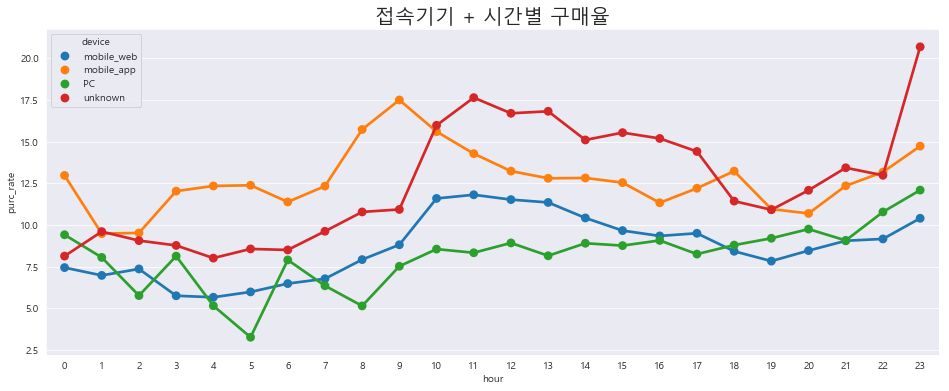

In [155]:
purchase_rate_by_dvc = pd.concat([purchase_rate_mobile_web, purchase_rate_mobile_app, purchase_rate_PC, purchase_rate_unknown]).reset_index(drop = True)

plt.figure(figsize = (16,6))
sns.pointplot(x = "hour", y = "purc_rate", hue = "device", data = purchase_rate_by_dvc)
plt.title("접속기기 + 시간별 구매율", fontsize = 20)

In [113]:
multi_table([purchase_rate_by_dvc.pivot("hour", "device", "tot_counts"), purchase_rate_by_dvc.pivot("hour", "device", "purc_counts")])

device,PC,mobile_app,mobile_web,unknown
hour,,,,
0,956,4743,6113,3407
1,683,2427,3819,1989
2,399,1260,2092,1115
3,283,690,1375,730
4,194,535,1061,562
5,276,630,1071,689
6,291,1476,1776,1389
7,520,2653,3089,2859
8,1420,4056,4308,4415


In [1]:
"""fig = px.line(purchase_rate_by_dvc, x="hour", y="purc_rate", color="device")
fig.show()"""

'fig = px.line(purchase_rate_by_dvc, x="hour", y="purc_rate", color="device")\nfig.show()'

모바일 앱에서의 구매율이 항상 가장 높음 

In [27]:
online_df.drop_duplicates(["clnt_id","sess_id","trfc_src","month","day","hour"], keep = "first")[ online_df.drop_duplicates(["clnt_id","sess_id","trfc_src","month","day","hour"], keep = "first").action_type == 6].\
groupby(["trfc_src", "hour"]).size().reset_index().rename(columns = {0 : 'purc_counts'})

,trfc_src,hour,purc_counts
0,DIRECT,0,30
1,DIRECT,1,14
2,DIRECT,2,4
3,DIRECT,3,5
4,DIRECT,4,5
5,DIRECT,5,5
6,DIRECT,6,7
7,DIRECT,7,11
8,DIRECT,8,29
9,DIRECT,9,51


In [120]:
#시간대별 총 session_id수
unique_sess_id_per_hour_by_trfc_src = online_df.drop_duplicates(["clnt_id","sess_id","trfc_src","month","day","hour"], keep = "first").\
groupby(["trfc_src", "hour"]).size().reset_index().rename(columns = {0 : 'tot_counts'})

unique_sess_id_per_hour_by_trfc_src = unique_sess_id_per_hour_by_trfc_src.sort_values(["trfc_src", "hour"], ascending = [1,1])

unique_purchase_id_per_hour_by_trfc_src = online_df[online_df.action_type==6].drop_duplicates(["clnt_id","sess_id"], keep = "first").groupby(["clnt_id","sess_id","hour","trfc_src"]).size().reset_index().groupby(["trfc_src","hour"]).size().reset_index(name = "purc_counts").sort_values(by = ["trfc_src","hour"], ascending = [1,1])

#시간대별 구매이력이 있는 session_id수
#unique_purchase_id_per_hour_by_trfc_src = online_df.drop_duplicates(["clnt_id","sess_id","trfc_src","month","day","hour"], keep = "first")[ online_df.drop_duplicates(["clnt_id","sess_id","trfc_src","month","day","hour"], keep = "first").action_type == 6].\
#groupby(["trfc_src", "hour"]).size().reset_index().rename(columns = {0 : 'purc_counts'})

purchase_rate_by_trfc_src = unique_sess_id_per_hour_by_trfc_src.merge(unique_purchase_id_per_hour_by_trfc_src, how = "left", on = ["trfc_src","hour"]).fillna(0)

purchase_rate_by_trfc_src["purc_rate"] = np.round(purchase_rate_by_trfc_src.purc_counts / purchase_rate_by_trfc_src.tot_counts * 100,2)

In [138]:
multi_table([purchase_rate_by_trfc_src.pivot("trfc_src", "hour", "tot_counts").T, purchase_rate_by_trfc_src.pivot("trfc_src", "hour", "purc_counts").T])

trfc_src,DIRECT,PORTAL_1,PORTAL_2,PORTAL_3,PUSH,WEBSITE,unknown
hour,,,,,,,
0,3713,350,54,47,605,539,9912
1,2298,235,41,44,316,387,5597
2,1323,117,12,29,153,236,2996
3,873,82,15,18,102,168,1820
4,677,60,10,8,86,164,1347
5,804,68,8,10,85,196,1496
6,1471,98,16,17,232,317,2781
7,2984,161,33,37,457,505,4944
8,4881,242,104,60,687,714,7512


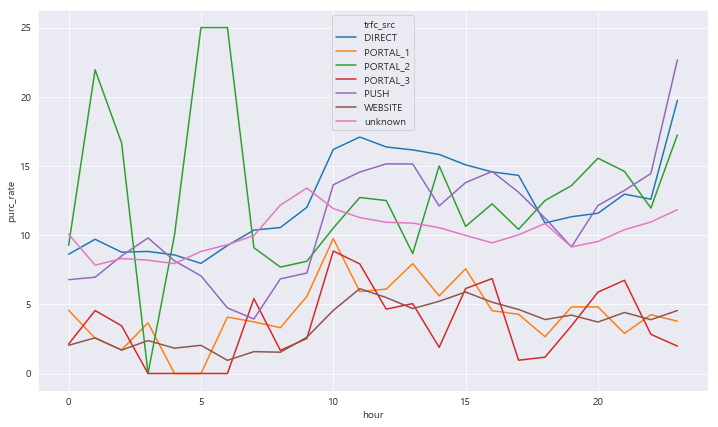

In [139]:
plt.figure(figsize = (12,7))
sns.lineplot(data = purchase_rate_by_trfc_src, x="hour", y="purc_rate", hue="trfc_src")

In [2]:
"""fig = px.line(purchase_rate_by_trfc_src, x="hour", y="purc_rate", color="trfc_src")
fig.show()"""

'fig = px.line(purchase_rate_by_trfc_src, x="hour", y="purc_rate", color="trfc_src")\nfig.show()'

* 5시경 PORTAL_2에서의 구매율이 높은 이유 => 해당 시간에 전체 접속수가 8건 밖에 되지 않으며 그 중 1개의 세션에서 구매기록이 있음. 전체 수가 너무 적어 비율상 높지만 신뢰할만하진 않음
* 전체적을 PORTAL을 통해 접속하였을 경우 구매율이 저조. ( 접속 수 및 구매 수 자체가 매우 적은 편임 )
* unknown의 경우 전체표본수도 충분하고 구매율도 타 접속경로에 비해 높은편  
  unknown의 경우 접속기기가 대부분 mobile임 ( mobile_app : 46.7% / mobile_web : 44.6% / PC : 8.7% )  
  => mobile을 통해 들어왔을때 구매율이 좀 더 높다고 판단가능?  
  이전 그래프에선 기기별 전체적 구매율의 큰 차이는 없어보였음

In [161]:
pd.crosstab(online_df[(online_df.dvc_ctg_nm == "unknown") | (online_df.trfc_src=="unknown")].trfc_src,
            online_df[(online_df.dvc_ctg_nm == "unknown") | (online_df.trfc_src=="unknown")].dvc_ctg_nm,
            normalize = "index" )

dvc_ctg_nm,PC,mobile_app,mobile_web,unknown
trfc_src,,,,
DIRECT,0.000000,0.000000,0.000000,1.0
PUSH,0.000000,0.000000,0.000000,1.0
WEBSITE,0.000000,0.000000,0.000000,1.0
unknown,0.104563,0.573839,0.321598,0.0


In [70]:
online_df.columns

Index(['clnt_id', 'sess_id', 'hit_seq', 'action_type', 'biz_unit', 'sess_dt',
       'hit_tm', 'hit_pss_tm', 'trans_id', 'sech_kwd', 'tot_pag_view_ct',
       'tot_sess_hr_v', 'trfc_src', 'dvc_ctg_nm', 'time', 'year', 'month',
       'day', 'weekday', 'hour', 'min', 'trans_seq', 'pd_c', 'buy_am',
       'buy_ct', 'clnt_gender', 'clnt_age', 'clac_nm1', 'clac_nm2',
       'clac_nm3'],
      dtype='object')

In [72]:
online_df[online_df.trfc_src == "unknown"].drop_duplicates(["clnt_id","sess_id"], keep = "first").groupby("dvc_ctg_nm").size() / online_df[online_df.trfc_src == "unknown"].drop_duplicates(["clnt_id","sess_id"], keep = "first").shape[0]

dvc_ctg_nm
PC            0.086811
mobile_app    0.467164
mobile_web    0.446025
dtype: float64

#### CLNT_ID별 각 action의 수

In [73]:
clnt_id_lst = online_df.clnt_id.unique()

In [74]:
clnt_id_lst[3]

4

In [102]:
"""
tmp_lst = []
for k, clnt_id in enumerate(clnt_id_lst):
    if (k+1) % 1000 == 0:
        print("Processing {}th clnt_id...".format(k+1))
    tmp_arr = online_df[online_df.clnt_id == clnt_id].action_type.value_counts(sort = False).values
    tmp_lst.append(tmp_arr)
"""

Processing 1000th clnt_id...
Processing 2000th clnt_id...
Processing 3000th clnt_id...
Processing 4000th clnt_id...
Processing 5000th clnt_id...
Processing 6000th clnt_id...
Processing 7000th clnt_id...
Processing 8000th clnt_id...
Processing 9000th clnt_id...
Processing 10000th clnt_id...
Processing 11000th clnt_id...
Processing 12000th clnt_id...
Processing 13000th clnt_id...
Processing 14000th clnt_id...
Processing 15000th clnt_id...
Processing 16000th clnt_id...
Processing 17000th clnt_id...
Processing 18000th clnt_id...
Processing 19000th clnt_id...
Processing 20000th clnt_id...
Processing 21000th clnt_id...
Processing 22000th clnt_id...
Processing 23000th clnt_id...
Processing 24000th clnt_id...
Processing 25000th clnt_id...
Processing 26000th clnt_id...
Processing 27000th clnt_id...
Processing 28000th clnt_id...
Processing 29000th clnt_id...
Processing 30000th clnt_id...
Processing 31000th clnt_id...
Processing 32000th clnt_id...
Processing 33000th clnt_id...
Processing 34000th 

In [106]:
# 6 => 구매한 item의 총 수. ( session_id로 groupby하지 않았으므로 동시에 구매한 item들도 독립적으로 count됨)
"""
action_counts_by_clnt_id = pd.concat([pd.DataFrame(clnt_id_lst),pd.DataFrame(tmp_lst).fillna(0)], axis=1)
action_counts_by_clnt_id.columns = ["clnt_id",0,1,2,3,4,5,6,7]
action_counts_by_clnt_id[(action_counts_by_clnt_id[0] - action_counts_by_clnt_id[1]) > 0]
"""

In [33]:
action_counts_by_clnt_id = pd.read_csv("action_counts_by_clnt_id.csv")

##### 구매한 기록이 있는 사람과 그렇지 않은 사람들의 action 분포

In [9]:
#구매 기록 있는 사람
action_counts_by_clnt_id_g1 = action_counts_by_clnt_id[action_counts_by_clnt_id['6'] != 0]

#구매 기록 없는 사람
action_counts_by_clnt_id_g2 = action_counts_by_clnt_id[action_counts_by_clnt_id['6'] == 0]

In [124]:
action_counts_by_clnt_id_g1.describe().drop("clnt_id", axis=1)

,0,1,2,3,4,5,6,7
count,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000
mean,50.122959,29.324312,44.781880,68.361377,24.582733,82.581703,19.414914,0.224004
std,73.716368,62.957368,71.809489,100.092551,55.901617,112.638859,73.941536,1.317044
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,10.000000,4.000000,9.000000,14.000000,4.000000,19.000000,2.000000,0.000000
50%,26.000000,11.000000,20.000000,34.000000,10.000000,43.000000,6.000000,0.000000
75%,61.000000,29.000000,50.000000,85.000000,27.000000,98.000000,16.000000,0.000000
max,1921.000000,1660.000000,1295.000000,2362.000000,2475.000000,1549.000000,1202.000000,45.000000


In [125]:
action_counts_by_clnt_id_g2.describe().drop("clnt_id", axis=1)

,0,1,2,3,4,5,6,7
count,65600.000000,65600.000000,65600.000000,65600.000000,65600.000000,65600.000000,65600.0,65600.0
mean,6.547683,3.529756,3.181829,1.710396,1.021311,0.750427,0.0,0.0
std,26.282159,10.892005,14.116540,8.598795,5.594389,6.456597,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,5.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0
max,2168.000000,797.000000,830.000000,383.000000,550.000000,532.000000,0.0,0.0


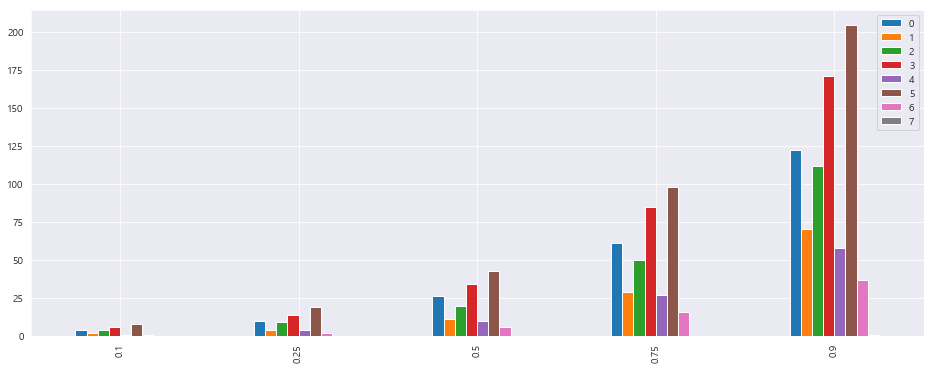

In [142]:
action_counts_by_clnt_id_g1.quantile([.1, .25, .5, .75, .9]).drop("clnt_id", axis=1).plot(kind = "bar", figsize= (16,6))

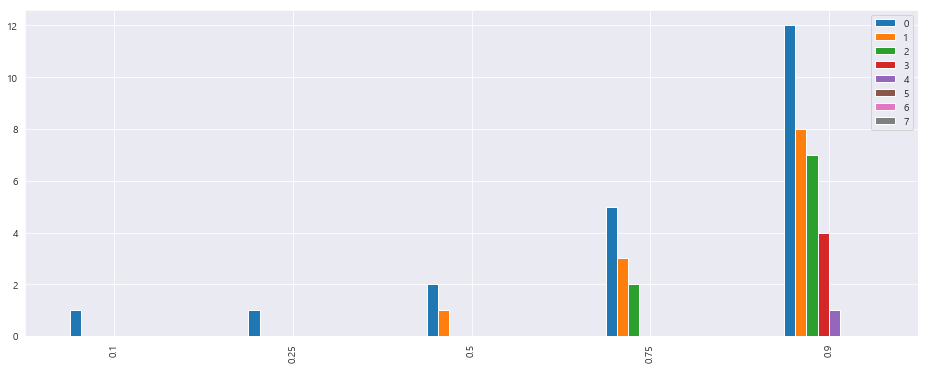

In [143]:
action_counts_by_clnt_id_g2.quantile([.1, .25, .5, .75, .9]).drop("clnt_id", axis=1).plot(kind = "bar", figsize= (16,6))

In [137]:
action_counts_by_clnt_id_g1.describe().drop("clnt_id", axis=1).loc["mean",:].values

array([50.12295926, 29.3243124 , 44.78187969, 68.36137667, 24.58273275,
       82.58170319, 19.41491396,  0.22400353])

In [3]:
"""fig = go.Figure()
fig.add_trace(go.Scatter(x=[0,1,2,3,4,5,6,7], y=action_counts_by_clnt_id_g1.describe().drop("clnt_id", axis=1).loc["mean",:].values,
                    mode='lines+markers',
                    name='mean_g1'))
fig.add_trace(go.Scatter(x=[0,1,2,3,4,5,6,7], y=action_counts_by_clnt_id_g2.describe().drop("clnt_id", axis=1).loc["mean",:].values,
                    mode='lines+markers',
                    name='mean_g2'))"""

'fig = go.Figure()\nfig.add_trace(go.Scatter(x=[0,1,2,3,4,5,6,7], y=action_counts_by_clnt_id_g1.describe().drop("clnt_id", axis=1).loc["mean",:].values,\n                    mode=\'lines+markers\',\n                    name=\'mean_g1\'))\nfig.add_trace(go.Scatter(x=[0,1,2,3,4,5,6,7], y=action_counts_by_clnt_id_g2.describe().drop("clnt_id", axis=1).loc["mean",:].values,\n                    mode=\'lines+markers\',\n                    name=\'mean_g2\'))'

#### 1회 평균 구매 상품 수 

In [167]:
mean_purchase_num = online_df[online_df.action_type==6].groupby(["clnt_id", "sess_id"]).size().reset_index().rename(columns={0:"counts"})

In [168]:
mean_purchase_num = mean_purchase_num.groupby("clnt_id").aggregate(["count", "sum", "mean", "min", "max"])["counts"].reset_index()

In [169]:
mean_purchase_num

,clnt_id,count,sum,mean,min,max
0,2,4,10,2.500000,1,5
1,4,1,1,1.000000,1,1
2,9,2,17,8.500000,8,9
3,12,1,1,1.000000,1,1
4,17,1,1,1.000000,1,1
5,19,1,1,1.000000,1,1
6,20,1,1,1.000000,1,1
7,22,1,1,1.000000,1,1
8,23,7,7,1.000000,1,1
9,24,2,17,8.500000,8,9


####  오프라인 구매정보 확인

In [103]:
trans_df = pd.read_csv("제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv")
item_df = pd.read_csv("제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv")

In [105]:
trans_df = trans_df[trans_df.biz_unit.isin(["B01","B02","B03"])].reset_index(drop = True)

In [108]:
trans_df_sub1 =  trans_df[trans_df.pd_c != "unknown"]
trans_df_sub2 =  trans_df[trans_df.pd_c == "unknown"]

In [112]:
trans_df_sub1["pd_c"] = trans_df_sub1.pd_c.astype(int)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [119]:
trans_df_sub1 = trans_df_sub1.merge(item_df, how = "left", on = "pd_c")

In [132]:
offline_df = pd.concat([trans_df_sub1, trans_df_sub2], sort = False).reset_index(drop = True)

In [135]:
offline_df.clac_nm1.value_counts()

Vegetables                                   42404
Snack Foods                                  38510
Dairy Products                               28833
Chilled Foods                                25777
Meats                                        25543
Substitute Foods                             22572
Beverages                                    20989
Fruits                                       20986
Liquors / Alcoholic Beverages                16259
Frozen Foods                                 15420
Cleaning / Laundry / Bathroom Accessories    11804
Spices / Seasonings                          11588
Kitchenware                                  11308
Sea Foods                                     7703
Detergents / Hygiene Goods                    5741
Personal Care                                 5645
Tenants / Restaurants                         5619
Dried Sea Foods                               5616
Cooked Foods                                  5460
Cosmetics / Beauty Care        

* 온라인과 오프라인 사이에 구매품목 순위에 크게 차이는 없는 듯

#### tmp 

In [142]:
pd.options.display.max_rows = 100

In [140]:
trans_df[trans_df.trans_id == 62037]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct


In [144]:
online_df.columns

Index(['clnt_id', 'sess_id', 'hit_seq', 'action_type', 'biz_unit', 'sess_dt',
       'hit_tm', 'hit_pss_tm', 'trans_id', 'sech_kwd', 'tot_pag_view_ct',
       'tot_sess_hr_v', 'trfc_src', 'dvc_ctg_nm', 'time', 'year', 'month',
       'day', 'weekday', 'hour', 'min', 'trans_seq', 'pd_c', 'buy_am',
       'buy_ct', 'clnt_gender', 'clnt_age', 'clac_nm1', 'clac_nm2',
       'clac_nm3'],
      dtype='object')

In [153]:
pd.crosstab(online_df.biz_unit, online_df.trfc_src)

trfc_src,DIRECT,PORTAL_1,PORTAL_2,PORTAL_3,PUSH,WEBSITE,unknown
biz_unit,,,,,,,
A01,16279,11449,1863,837,0,6221,160458
A02,9,0,0,902,0,453,667694
A03,1752344,29806,29496,8190,540362,43432,0


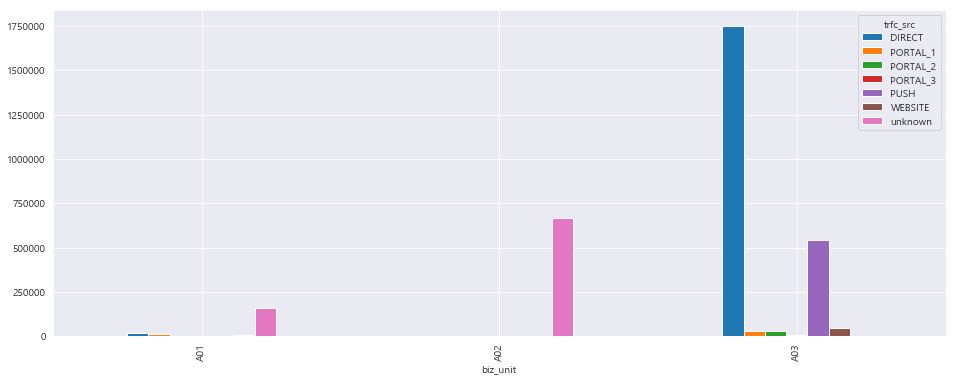

In [152]:
pd.crosstab(online_df.biz_unit, online_df.trfc_src).plot(kind = 'bar', figsize = (16,6))

In [149]:
pd.crosstab(online_df.biz_unit, online_df.dvc_ctg_nm)

dvc_ctg_nm,PC,mobile_app,mobile_web
biz_unit,,,
A01,38001,115133,43930
A02,77730,360584,230291
A03,153129,0,410588


In [147]:
online_df.groupby(["biz_unit", "trfc_src"]).size().reset_index()

,biz_unit,trfc_src,0
0,A01,DIRECT,16279
1,A01,PORTAL_1,11449
2,A01,PORTAL_2,1863
3,A01,PORTAL_3,837
4,A01,WEBSITE,6221
5,A01,unknown,160458
6,A02,DIRECT,9
7,A02,PORTAL_3,902
8,A02,WEBSITE,453
9,A02,unknown,667694


In [164]:
pd.options.display.max_columns = 50

In [ ]:
online_df.drop_duplicates(["clnt_id", "sess_id"], keep = "last")

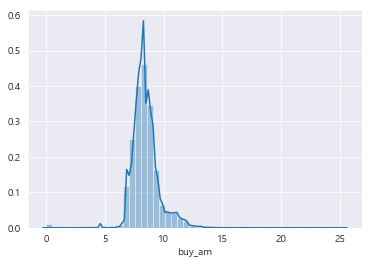

In [227]:
sns.distplot(np.log1p(online_df[(online_df.action_type == 6) & (online_df.buy_am != -1)].buy_am))

In [182]:
online_df.loc[online_df.action_type==6, "tot_amount"].describe()

count    1.296820e+05
mean     3.948164e+06
std      1.145128e+09
min      0.000000e+00
25%      1.000000e+00
50%      2.800000e+03
75%      6.400000e+03
max      4.000000e+11
Name: tot_amount, dtype: float64

In [203]:
online_df[online_df.buy_ct > 1].groupby("clac_nm1").aggregate(["mean","max","std"])[["buy_ct"]]

buy_ct                  
                                               mean    max        std
clac_nm1                                                             
Baby Foods                                 2.125000    3.0   0.353516
Ball Game / Field Sports                   2.833984    6.0   1.601562
Bedding / Handicraft                       2.714844    4.0   0.951172
Beverages                                  3.326172   40.0   3.183594
Birth Supplies / Baby Products             3.685547   20.0   3.570312
Canned / Jarred Foods                      6.148438  500.0  42.000000
Cell Phones / Accessories                  2.750000    5.0   1.500000
Chilled Foods                              2.410156   14.0   1.108398
Cleaning / Laundry / Bathroom Accessories  6.554688   20.0   4.781250
Coffee / Tea                               2.417969    6.0   0.818359
Computers                                  3.333984    6.0   1.750977
Cooked Foods                               2.208984    5.0   0.534180
Cosmetics / Beauty Care                    2.500000    7.0   1.004883
Dairy Products                             2.855469   20.0   2.058594
Detergents / Hygiene Goods                 2.886719   20.0   1.896484
Dried Sea Foods                            2.427734   20.0   1.767578
Fashion Accessories                        2.166016    3.0   0.408203
Frozen Foods                               3.330078   28.0   2.363281
Fruits                                     2.947266   30.0   2.318359
Furniture                                  3.000000    9.0   2.210938
Gardening / Pets                           2.230469    4.0   0.599121
Grains                                     2.390625    6.0   1.033203
Health / Fitness Training                  2.000000    2.0        NaN
Health Care                                5.582031   20.0   5.316406
Health Foods                               2.261719    4.0   0.619141
Heating / Cooling Electronics              3.666016    6.0   2.082031
Home / Kitchen Appliances                  3.000000    3.0   0.000000
Home Decor / Lighting                      3.000000    6.0   2.000000
Kids' Clothing                             2.000000    2.0   0.000000
Kitchenware                                2.720703   20.0   2.595703
Liquors / Alcoholic Beverages              4.375000    8.0   2.199219
Meats                                      2.974609   35.0   2.519531
Men's Clothing                             2.000000    2.0   0.000000
Others (Non-Products)                      3.000000    4.0   0.816406
Outdoor / Leisure Activities               2.000000    2.0   0.000000
Personal Care                              2.396484   10.0   0.930176
Sea Foods                                  5.144531   40.0   6.109375
Snack Foods                                2.671875   20.0   1.619141
Spices / Seasonings                        2.285156   11.0   1.048828
Sport Fashion                              4.417969   15.0   4.296875
Stationary / Office Supplies               2.818359    5.0   1.250000
Substitute Foods                           2.826172   20.0   2.152344
Tableware / Cooking Utensils               2.412109    4.0   0.712402
Tools / Safety Supplies                    3.800781   10.0   3.494141
Toy                                        2.500000    3.0   0.707031
Travel / Leisure Services                  2.000000    2.0        NaN
Underwear / Socks and Hosiery / Homewear   2.378906    5.0   0.819824
Vegetables                                 2.457031   20.0   1.408203
Video / Audio System Electronics           2.000000    2.0        NaN
Women's Clothing                           2.000000    2.0   0.000000
unknown                                    2.523438   12.0   1.466797

In [187]:
10500000 / 500

21000.0

In [191]:
1.326780e+06 > 1e7

False

In [211]:
online_df.drop("tot_amount", axis=1, inplace = True)

In [209]:
offline_df[offline_df.buy_am > 1e6]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3
12217,67700,38394,1,B01,1018,20190717,20:22,2000000,2,Others (Non-Products),Income from leasing,Income from leasing
31684,17576,123710,1,B01,158,20190905,11:10,2393600,32,Canned / Jarred Foods,Canned Food Gift Sets,Canned Mix Food Gift Sets
31744,17576,123711,1,B01,159,20190905,11:05,2056100,29,Canned / Jarred Foods,Canned Food Gift Sets,Canned Tuna Gift Sets
35559,43143,127957,1,B01,241,20190905,14:10,4935000,470,Coffee / Tea,Premixed Coffee,Mixed Coffee
40921,12741,139275,1,B01,158,20190902,16:04,1540000,50,Canned / Jarred Foods,Canned Food Gift Sets,Canned Mix Food Gift Sets
42510,63753,136843,1,B01,158,20190902,11:34,1047000,30,Canned / Jarred Foods,Canned Food Gift Sets,Canned Mix Food Gift Sets
45098,27197,116235,1,B01,1015,20190907,18:13,1400000,14,Men's Clothing,Men's Upper Bodywear / Tops,Men's T-shirts
80709,43143,127882,1,B01,237,20190801,15:16,11800000,500,Coffee / Tea,Coffee Sets and Tea Sets,Coffee Sets
83413,47713,116913,1,B01,1058,20190901,20:35,1266700,53,Personal Care,Hair Care,Hair Care Gift Sets
83897,17576,123722,1,B01,159,20190906,16:10,2056100,29,Canned / Jarred Foods,Canned Food Gift Sets,Canned Tuna Gift Sets


In [218]:
online_df.groupby(["clnt_id","sess_id"]).size().reset_index()[online_df.groupby(["clnt_id","sess_id"]).size().reset_index()[0] == 1]

,clnt_id,sess_id,0
13,2,12,1
18,2,17,1
19,2,18,1
24,5,1,1
27,7,1,1
30,7,4,1
32,8,1,1
33,8,2,1
47,9,14,1
48,9,15,1


In [220]:
online_df.groupby(["clnt_id","sess_id", "dvc_ctg_nm"]).size().reset_index()[online_df.groupby(["clnt_id","sess_id", "dvc_ctg_nm"]).size().reset_index()[0] == 1].dvc_ctg_nm.value_counts()

mobile_web    57223
mobile_app    28306
PC            13930
Name: dvc_ctg_nm, dtype: int64

In [224]:
online_df.groupby(["clnt_id","sess_id", "dvc_ctg_nm"]).size().reset_index().dvc_ctg_nm.value_counts()

mobile_web    122548
mobile_app     86626
PC             37476
Name: dvc_ctg_nm, dtype: int64

In [225]:
online_df.groupby(["clnt_id","sess_id", "dvc_ctg_nm"]).size().reset_index()[online_df.groupby(["clnt_id","sess_id", "dvc_ctg_nm"]).size().reset_index()[0] == 1].dvc_ctg_nm.value_counts() / online_df.groupby(["clnt_id","sess_id", "dvc_ctg_nm"]).size().reset_index().dvc_ctg_nm.value_counts()
# 각 접속기기 별 반송률 ( 접속 후 바로 나간 사람 )
# 접속기기 NaN인 경우 위의 두가지 모두에서 count가 되지 않음 => unknown으로 바꾸고 다시 해보는것도 좋을것

mobile_web    0.466944
mobile_app    0.326761
PC            0.371705
Name: dvc_ctg_nm, dtype: float64

#### 나이대별 주 사용 기기 및 접속경로

In [19]:
demo_info =online_df[online_df.clnt_age!="unknown"].drop_duplicates(["clnt_id","sess_id"], keep ="first")[["clnt_age","clnt_gender","dvc_ctg_nm","trfc_src"]]

In [20]:
demo_info.reset_index(drop = True, inplace = True)

In [27]:
demo_info_summ = demo_info.groupby(["clnt_age","clnt_gender","dvc_ctg_nm" ,"trfc_src"]).size().reset_index(name = "counts")

c:\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



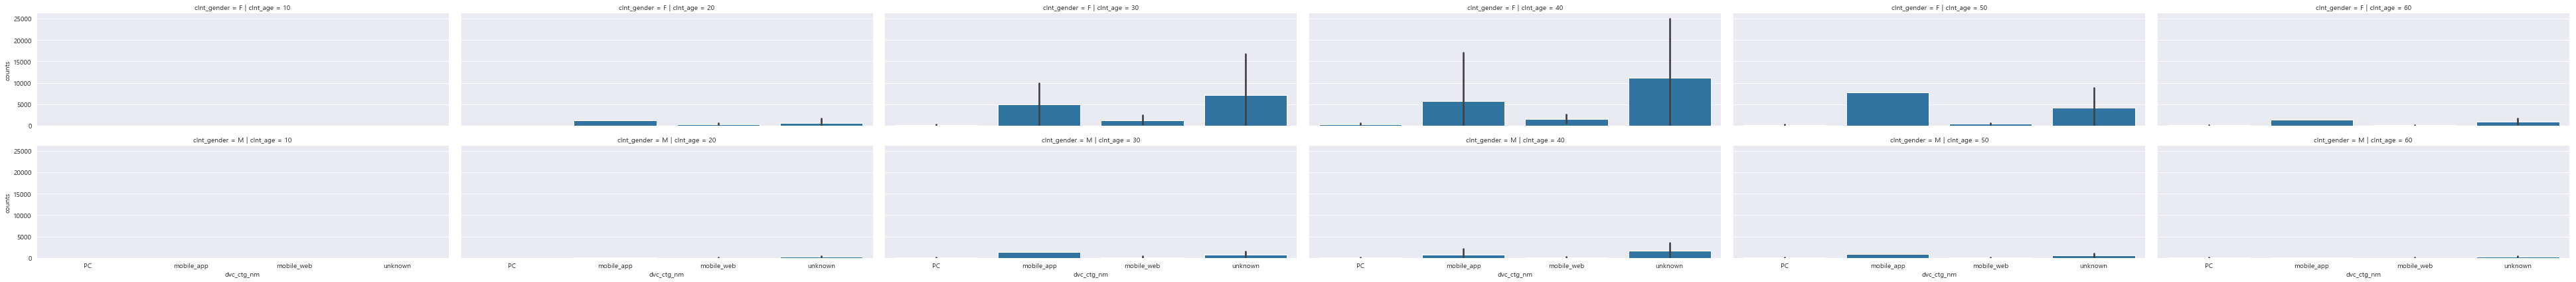

In [37]:
"""g = sns.FacetGrid(demo_info_summ, col="clnt_age", row ="clnt_gender", aspect=3, height=3)
g.map(sns.barplot, "dvc_ctg_nm", "counts")"""

In [28]:
demo_info_summ

,clnt_age,clnt_gender,dvc_ctg_nm,trfc_src,counts
0,10,F,PC,DIRECT,3
1,10,F,PC,WEBSITE,1
2,10,F,mobile_app,unknown,42
3,10,F,mobile_web,DIRECT,9
4,10,F,mobile_web,PORTAL_1,2
5,10,F,mobile_web,PUSH,1
6,10,F,mobile_web,WEBSITE,5
7,10,F,mobile_web,unknown,46
8,10,F,unknown,DIRECT,7
9,10,F,unknown,PUSH,1


In [38]:
#접속기기별 첫번째 action_type의 분포

In [41]:
tmp = online_df.drop_duplicates(["clnt_id","sess_id"], keep = "first")[["action_type","dvc_ctg_nm","trfc_src"]]

In [46]:
pd.concat([tmp[["dvc_ctg_nm","trfc_src"]],pd.get_dummies(tmp.action_type)], axis=1).groupby(["trfc_src"]).mean()

,0,1,2,3,4,5,6,7
trfc_src,,,,,,,,
DIRECT,0.335740,0.073987,0.143477,0.264335,0.008673,0.167545,0.005669,0.000574
PORTAL_1,0.752362,0.019159,0.168414,0.028220,0.006861,0.012816,0.011909,0.000259
PORTAL_2,0.455464,0.074839,0.163912,0.203857,0.033976,0.060147,0.007805,0.000000
PORTAL_3,0.358879,0.081620,0.443614,0.056698,0.004984,0.047352,0.006854,0.000000
PUSH,0.182427,0.132979,0.155895,0.328938,0.006221,0.189446,0.003722,0.000372
WEBSITE,0.110177,0.019521,0.803821,0.028204,0.003543,0.019799,0.014866,0.000069
unknown,0.327333,0.043259,0.571260,0.000351,0.003031,0.013577,0.033626,0.007564
